## Train a model with bike rental data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!pip install xgboost==0.90

In [2]:
!python -m pip install --upgrade pip

In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost 
import xgboost as xgb

In [4]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [5]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [6]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [7]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [8]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,87,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,248,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,334,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,623,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,70,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [9]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [10]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [11]:
X_train


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,2,0,0,1,24.60,29.545,18,30.0026,2012,4,8,6,14
7616,4,0,1,1,13.94,15.910,46,15.0013,2012,11,5,0,18
7617,1,0,1,1,19.68,23.485,82,19.0012,2012,3,13,1,9
7618,1,0,1,1,6.56,8.335,55,11.0014,2012,1,19,3,11


In [12]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
#regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)
regressor = xgb.XGBRegressor(max_depth=5,n_estimators=150)

In [13]:
regressor

XGBRegressor(max_depth=5, n_estimators=150)

In [ ]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

In [14]:
eval_result = regressor.evals_result()

AttributeError: 'XGBRegressor' object has no attribute 'evals_result_'

In [15]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

NameError: name 'eval_result' is not defined

In [16]:
print(training_rounds)

NameError: name 'training_rounds' is not defined

In [17]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

NameError: name 'training_rounds' is not defined

In [18]:
xgb.plot_importance(regressor)
plt.show()

XGBoostError: need to call fit or load_model beforehand

In [19]:
# Verify Quality using Validation dataset
# Compare actual vs predicted performance with dataset not seen by the model before
df = pd.read_csv(validation_file,names=columns)

In [20]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [21]:
df.shape

(3266, 14)

In [22]:
X_test = df.iloc[:,1:]
print(X_test[:5])

   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       3        0           1        2  28.70  33.335        79    12.9980   
1       2        0           0        1  32.80  37.880        55    12.9980   
2       1        0           1        1  14.76  16.665        40    19.9995   
3       1        0           1        1   9.02   9.090        47    36.9974   
4       4        0           0        1  10.66  15.150        87     0.0000   

   year  month  day  dayofweek  hour  
0  2011      7    7          3     8  
1  2011      6   11          5    13  
2  2011      2   14          0     2  
3  2011      2    8          1    10  
4  2011     12    4          6     8  


In [23]:
result = regressor.predict(X_test)

XGBoostError: need to call fit or load_model beforehand

In [24]:
result[:5]

NameError: name 'result' is not defined

In [25]:
df['count_predicted'] = result

NameError: name 'result' is not defined

In [26]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [27]:
# Negative Values are predicted
df['count_predicted'].describe()

KeyError: 'count_predicted'

In [28]:
df[df['count_predicted'] < 0]

KeyError: 'count_predicted'

In [29]:
df['count_predicted'].hist()
plt.title('Predicted Count Histogram')
plt.show()

KeyError: 'count_predicted'

In [30]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [31]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

KeyError: 'count_predicted'

In [32]:
df[df['count_predicted'] < 0]

KeyError: 'count_predicted'

KeyError: 'count_predicted'

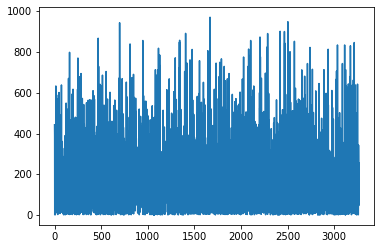

In [33]:
# Actual Vs Predicted
plt.plot(df['count'], label='Actual')
plt.plot(df['count_predicted'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

In [34]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count'] - df['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

KeyError: 'count_predicted'

In [35]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:0.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:0.2f}'.format(value_counts[False]/len(residuals)))

NameError: name 'residuals' is not defined

In [36]:
print("RMSE: {0:0.2f}".format(mean_squared_error(df['count'],df['count_predicted'])**.5))

KeyError: 'count_predicted'

In [37]:
# RMSlE - Root Mean Squared Log Error
# RMSLE Metric is used by Kaggle for this competition

# RMSE Cost Function - Magnitude of difference matters

# RMSLE cost function - "Only Percentage difference matters"

# Reference:Katerina Malahova, Khor SoonHin 
# https://www.slideshare.net/KhorSoonHin/rmsle-cost-function
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [38]:
print('RMSLE')
print(compute_rmsle(100,50),
      compute_rmsle(1000,500),
      compute_rmsle(10000,5000))

RMSLE
0.683294884116934 0.6921486782303559 0.6930471955576127


In [39]:
print('RMSLE')
print(compute_rmsle(100,25),
      compute_rmsle(1000,250),
      compute_rmsle(10000,2500))

RMSLE
1.3570239788197775 1.383301840183437 1.3859944360988976


In [40]:
print('RMSE')
print(mean_squared_error([100],[50])**.5,
      mean_squared_error([1000],[500])**.5, 
      mean_squared_error([10000],[5000])**.5)

RMSE
50.0 500.0 5000.0


In [41]:
print('RMSE')
print(mean_squared_error([100],[25])**.5,
      mean_squared_error([1000],[250])**.5, 
      mean_squared_error([10000],[2500])**.5)

RMSE
75.0 750.0 7500.0


In [42]:
print("RMSLE: {0}".format(compute_rmsle(df['count'],df['count_predicted'])))

KeyError: 'count_predicted'

In [ ]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [ ]:
df_test.head()

In [ ]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [ ]:
X_test.head()

In [ ]:
result = regressor.predict(X_test)

In [ ]:
result[:5]

In [ ]:
df_test["count"] = result

In [ ]:
df_test.head()

In [ ]:
df_test[df_test["count"] < 0]

In [ ]:
df_test["count"] = df_test["count"].map(adjust_count)

In [ ]:
df_test[['datetime','count']].to_csv('predicted_count.csv',index=False)

In [ ]:
# RMSLE (Kaggle) Score
# Test 1: 0.62